In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading data and normalization with "/255.0"
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


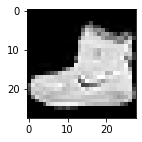

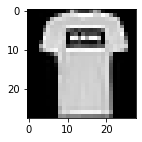

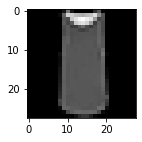

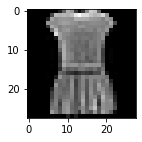

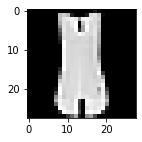

In [3]:
# Quick review
for n in range(0,5):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[n], cmap="gray")

In [4]:
# We are using the functional API with importing "Model"
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [5]:
# The data has 2 dimensions
# Convolution expects height x width x color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [6]:
# number of classes
K = len(set(y_train)) # We added "set()" because we want uniqe values
print("number of classes:", K)

number of classes: 10


In [7]:
print(X_train[0].shape)

(28, 28, 1)


In [8]:
# Building the model using the functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [9]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5109 - accuracy: 0.8165 - val_loss: 0.4401 - val_accuracy: 0.8346
Epoch 2/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3631 - accuracy: 0.8671 - val_loss: 0.4241 - val_accuracy: 0.8390
Epoch 3/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3235 - accuracy: 0.8818 - val_loss: 0.3301 - val_accuracy: 0.8792
Epoch 4/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2971 - accuracy: 0.8904 - val_loss: 0.3638 - val_accuracy: 0.8693
Epoch 5/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2772 - accuracy: 0.8982 - val_loss: 0.3296 - val_accuracy: 0.8797
Epoch 6/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2599 - accuracy: 0.9043 - val_loss: 0.3499 - val_accuracy: 0.8743
Epoch 7/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2456 - accuracy: 0.9104 - val_loss: 0.3245 -

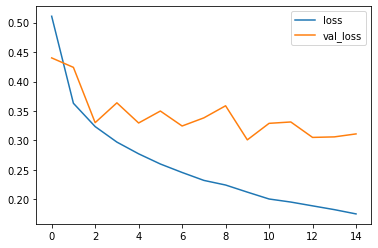

In [10]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

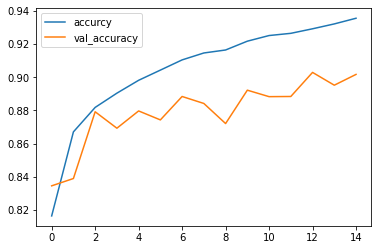

In [11]:
plt.plot(r.history["accuracy"], label="accurcy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

[[884   0  33  17   1   1  60   0   4   0]
 [  3 975   1  14   2   0   4   0   1   0]
 [ 19   0 902   9  23   0  47   0   0   0]
 [ 17   8  21 911  20   0  23   0   0   0]
 [  3   0  97  21 758   0 118   0   3   0]
 [  0   0   0   2   0 973   0  22   0   3]
 [130   0  86  24  37   0 715   0   8   0]
 [  0   0   0   0   0   7   0 977   0  16]
 [  4   0  10   2   2   8   7   0 967   0]
 [  0   0   0   0   0   6   0  39   0 955]]


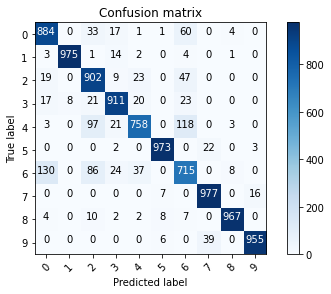

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

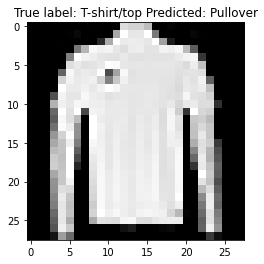

In [13]:
# We should write these in order
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [15]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.3110397458076477
Test accuracy: 0.9017000198364258


In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256   